<a href="https://colab.research.google.com/github/manthandas/Airbnb-Analysis-Python-Capstone-EDA-Project/blob/main/AirBnB_EDAproject(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
import seaborn as sb

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
airbnb_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter Project/Airbnb NYC 2019.csv')
airbnb_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
airbnb_df.head().T

,0,1,2,3,4
id,2539,2595,3647,3831,5022
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149,225,150,89,80


In [5]:
rename_column = {'id':'listing_id', 'name':'listing_name', 'number_of_reviews':'total_reviews', 'calculated_host_listings_count':'host_listings_count'}

In [6]:
airbnb_df = airbnb_df.rename(columns = rename_column)
airbnb_df.head(5)

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,last_review,reviews_per_month,host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
airbnb_df.shape

(48895, 16)

In [8]:
airbnb_df['listing_name'].fillna('unknown', inplace = True)
airbnb_df['host_name'].fillna('no_name', inplace = True)

In [9]:
airbnb_df[['host_name', 'listing_name']].isnull().sum()

host_name       0
listing_name    0
dtype: int64

In [10]:
airbnb_df.sample(10)

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,last_review,reviews_per_month,host_listings_count,availability_365
8864,6797129,Spacious 1BR & Loft near Park,8924676,Taeler,Manhattan,Upper West Side,40.77824,-73.97701,Entire home/apt,375,1,0,NaN,NaN,1,0
33798,26781602,Cozy apartment in the East Village,16149213,David,Manhattan,East Village,40.72541,-73.98398,Entire home/apt,174,2,6,2019-05-19,2.12,1,5
24653,19811020,Upper East Side Space and Access!!,30245313,Jewel,Manhattan,Upper East Side,40.76775,-73.95371,Private room,187,1,6,2017-12-12,0.26,1,0
36209,28787365,1Cozy bedsty room,144204336,Jason,Brooklyn,Bedford-Stuyvesant,40.69336,-73.93857,Private room,53,2,18,2019-06-24,2.49,2,333
33469,26455093,Presidential Comfort,198476726,Cathy,Queens,Far Rockaway,40.60395,-73.74904,Private room,55,1,27,2019-07-07,2.21,1,177
25669,20556243,"Gorgeous, light-filled two-story apartment",131490584,Bree,Brooklyn,Clinton Hill,40.68557,-73.96056,Private room,60,4,0,NaN,NaN,1,0
32600,25583366,Upper East Side entire flat - Close to Subway,14073337,Marc & Youna,Manhattan,Upper East Side,40.77773,-73.95383,Entire home/apt,180,4,9,2019-05-26,0.71,1,4
44898,34453829,Spacious Private Queen in Heart of New York City!,260191397,Hotel Mela,Manhattan,Theater District,40.75590,-73.98562,Private room,100,1,2,2019-06-03,1.36,7,298
14117,10828230,"Sunny, Cozy, Prospect Heights Apt.",56066018,Alex,Brooklyn,Crown Heights,40.67860,-73.96210,Private room,45,1,1,2016-03-01,0.02,1,0
47630,35839537,Empire State Jazz! Superb location!,269585762,Teri,Manhattan,Midtown,40.74894,-73.98788,Entire home/apt,99,1,2,2019-06-22,2.00,1,264


In [11]:
airbnb_df.describe()

,listing_id,host_id,latitude,longitude,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [12]:
# 1. distribution of price range in Airbnb Bookings

def iqr_technique(DFcolumn):
  Q1 = np.percentile(DFcolumn, 25)
  Q3 = np.percentile(DFcolumn, 75)
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)

  return lower_range, upper_range

In [13]:
lower_bound, upper_bound = iqr_technique(airbnb_df['price'])
airbnb_df = airbnb_df[(airbnb_df.price > lower_bound) & (airbnb_df.price < upper_bound)]

In [14]:
print(airbnb_df['price'].max())

333


<ipython-input-15-915db3e0e1e1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(airbnb_df['price'], color = ('#008000'))


Text(0.5, 1.0, 'Distribution of AirBnB Prices')

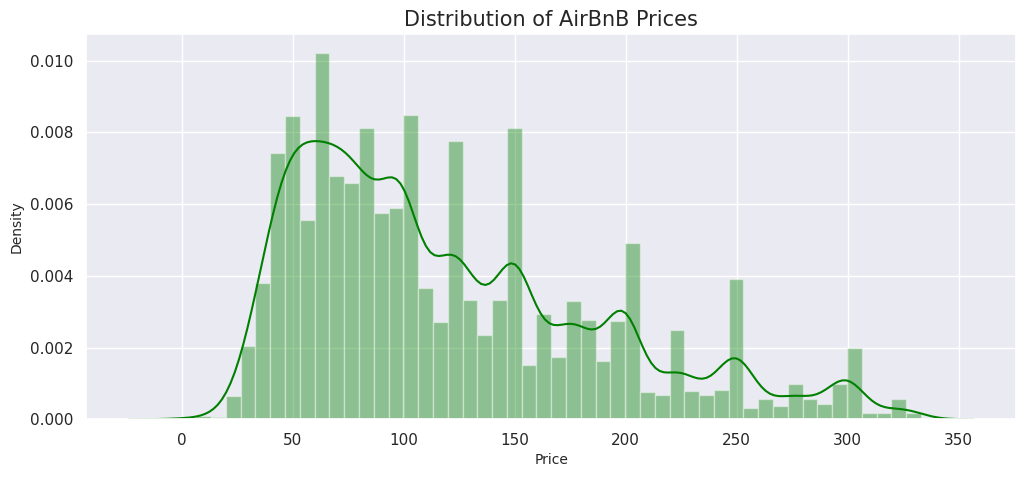

In [15]:
mpl.figure(figsize = (12, 5))

sb.set_theme(style = 'darkgrid')

sb.distplot(airbnb_df['price'], color = ('#008000'))

mpl.xlabel('Price', fontsize = 10)
mpl.ylabel('Density', fontsize = 10)

mpl.title('Distribution of AirBnB Prices', fontsize = 15)

In [16]:
# 2. no. of hosts per location

HostsPerLoc = airbnb_df.groupby('neighbourhood_group')['listing_id'].count().reset_index()

HostsPerLoc.columns = ['Neighbourhood_Groups', 'Host_counts']

HostsPerLoc

,Neighbourhood_Groups,Host_counts
0,Bronx,1070
1,Brooklyn,19415
2,Manhattan,19501
3,Queens,5567
4,Staten Island,365


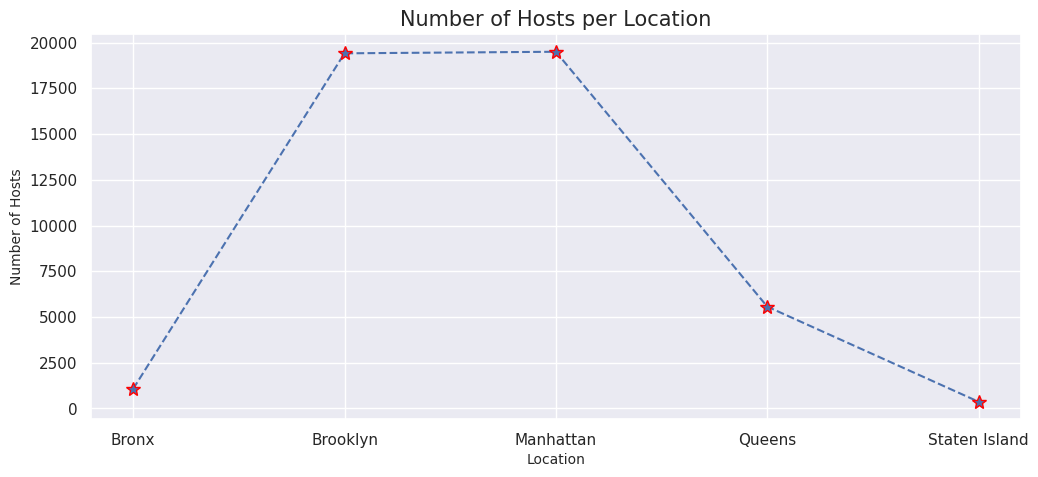

In [17]:
HostsPerLoc = airbnb_df['listing_id'].groupby(airbnb_df['neighbourhood_group']).count()

locations = HostsPerLoc.index
host_counts = HostsPerLoc.values

mpl.figure(figsize = (12, 5))
mpl.plot(locations, host_counts, marker = '*', markersize = 10, markeredgewidth = 1, markeredgecolor = '#ff0000', linestyle = '--')
mpl.title('Number of Hosts per Location', fontsize = 15)
mpl.xlabel('Location', fontsize = 10)
mpl.ylabel('Number of Hosts', fontsize = 10)

mpl.show()

In [18]:
# 3. average price of each neighborhood group

grouped = airbnb_df.groupby("neighbourhood_group").mean()

avg_price_of_neighbourhood_group = grouped.reset_index()

avg_price_of_neighbourhood_group = round(avg_price_of_neighbourhood_group.rename(columns={"price": "avg_price"}),2)

avg_price_of_neighbourhood_group[['neighbourhood_group', 'avg_price']].head()

<ipython-input-18-6db0f7dd83d7>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = airbnb_df.groupby("neighbourhood_group").mean()


,neighbourhood_group,avg_price
0,Bronx,77.37
1,Brooklyn,105.70
2,Manhattan,145.90
3,Queens,88.90
4,Staten Island,89.24


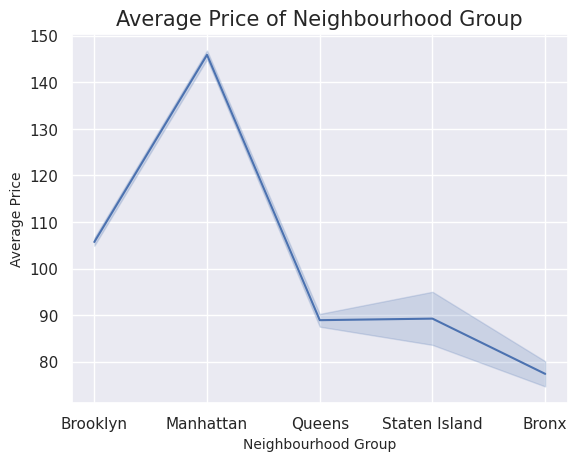

In [19]:
# 3(a). lineplot

sb.lineplot(x = 'neighbourhood_group', y = 'price', data = airbnb_df, estimator = np.mean)

mpl.xlabel('Neighbourhood Group', fontsize = 10)
mpl.ylabel('Average Price', fontsize = 10)
mpl.title('Average Price of Neighbourhood Group', fontsize = 15)
mpl.show()

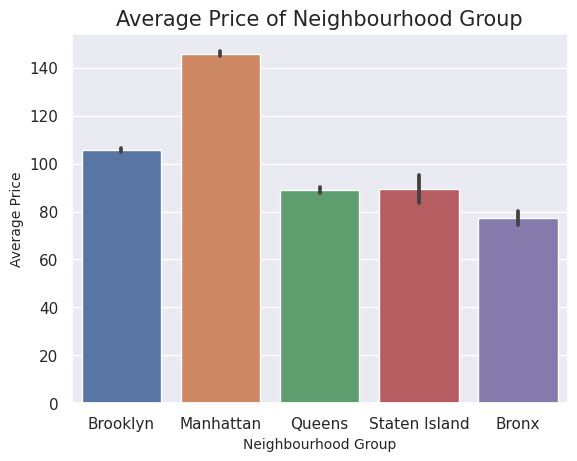

In [20]:
# 3(b). barplot

sb.barplot(x = 'neighbourhood_group', y = 'price', data = airbnb_df, estimator = np.mean)

mpl.xlabel('Neighbourhood Group', fontsize = 10)
mpl.ylabel('Average Price', fontsize = 10)
mpl.title('Average Price of Neighbourhood Group', fontsize = 15)
mpl.show()